# Reliability
https://weibull.readthedocs.io/en/v0.0.11/examples.html#life-calculations

## Examples
Determining β and η Values
Before any suppositions may be gathered, it is appropriate to calculate β and η values. Once we are satisfied that β and η match the raw data, we can move on to determining useful life characteristics for the product.

## Example 1: Complete Test Data
In this example, we will take a complete set of failure data that has no censorship and apply basic weibull analysis tool suite in order to achieve a simple, accurate, and useful analysis.:

In [4]:
#!pip install weibull
import warnings
warnings.filterwarnings('ignore')

In this example, we chose to use the Maximum Likelihood Estimation method of estimating β and η, which is shown in the analysis.fit(method='mle) line. If the fit() method were called with no parameters, it would - by default - have used linear regression.

By examining the probability plot, we can visually determine if the β and η are appropriately calculated.

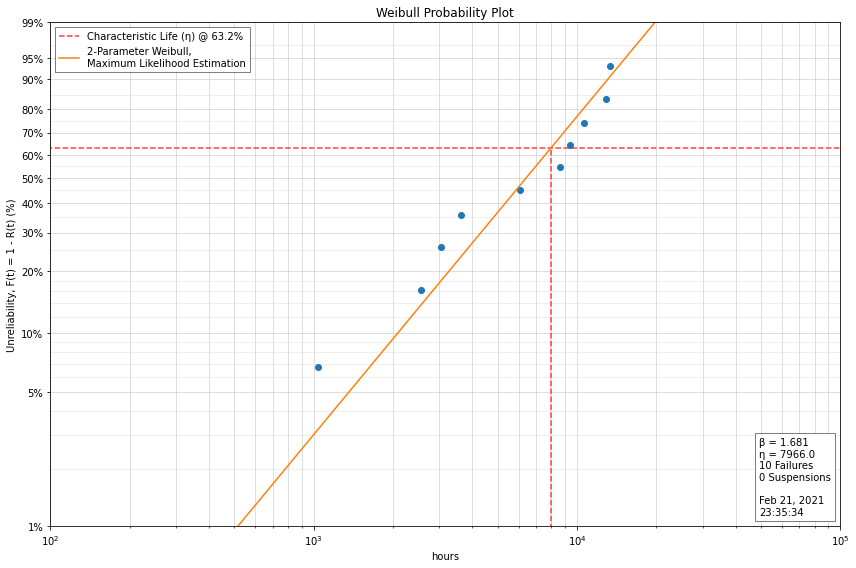

In [6]:
import weibull

# fail times include no censored data
fail_times = [
    9402.7,
    6082.4,
    13367.2,
    10644.6,
    8632.0,
    3043.4,
    12860.2,
    1034.5,
    2550.9,
    3637.1
]

# this is where the actual analysis and curve fitting occur
analysis = weibull.Analysis(fail_times,
                            unit='hour')
analysis.fit(method='mle')

analysis.probplot()

In this example, we chose to use the Maximum Likelihood Estimation method of estimating β and η, which is shown in the analysis.fit(method='mle) line. If the fit() method were called with no parameters, it would - by default - have used linear regression.

By examining the probability plot, we can visually determine if the β and η are appropriately calculated.

By specifying a file name, the probability plot can be saved to a file 
* analysis.probplot(file_name='prob.png'). 

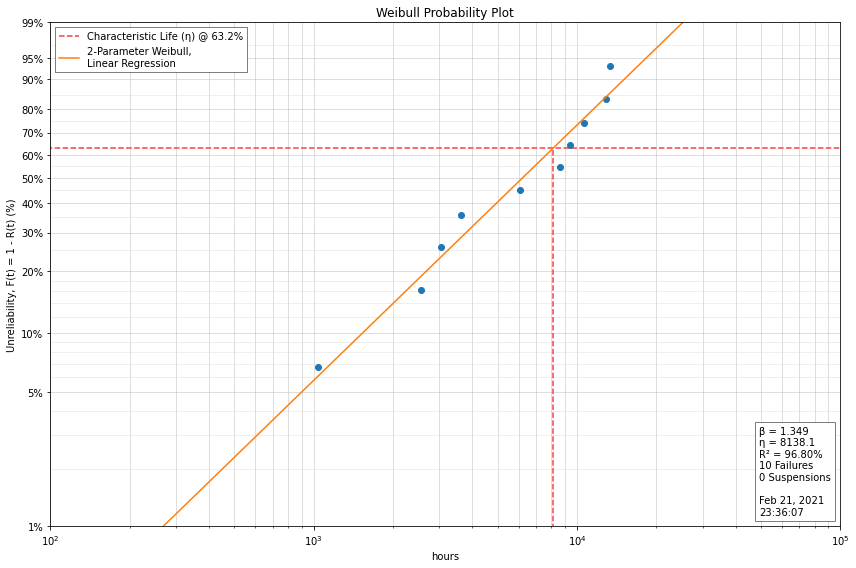

In [7]:
# fail times include no censored data
fail_times = [
    9402.7,
    6082.4,
    13367.2,
    10644.6,
    8632.0,
    3043.4,
    12860.2,
    1034.5,
    2550.9,
    3637.1
]

# this is where the actual analysis and curve fitting occur
analysis = weibull.Analysis(fail_times,
                            unit='hour')
#Using Linear regression
analysis.fit()

analysis.probplot()

## Example 2: Right-Censored Data
Often, it is necessary to use only the smallest amount of data in order to calculate the values for β and η. For instance, a long-running test might have 10 units on the test bench, but only 3 of them have failed. When the data is so small, the default linear regression fit method is probably going to yield better results than the maximum-likelihood estimation:

In [23]:
import pandas as pd
pd.DataFrame([fail_times, suspended])

,0,1,2,3,4,5,6,7,8,9
0,4200,4200,4200,4200,4200,4200,3043.4,1034.5,2550.9,4200
1,True,True,True,True,True,True,False,False,False,True


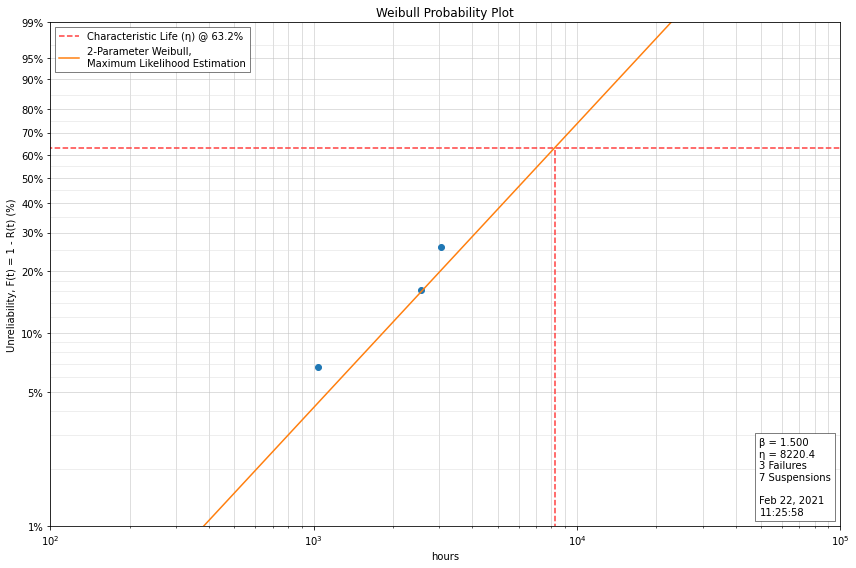

In [24]:
current_run_time = 4200.0

fail_times = [current_run_time] * 10
fail_times[7] = 1034.5
fail_times[8] = 2550.9
fail_times[6] = 3043.4

suspended = [True, True, True, True, True,
             True, False, False, False, True]

analysis = weibull.Analysis(fail_times,
                            suspended=suspended,
                            unit='hour')
analysis.fit(method= 'mle')

analysis.probplot()

### Life Calculations

Once β and η are determined, then they may be utilized to obtain the basic lifetime data that may be utilized for planning. One common reliability metric is the B-Life. Obtaining a B10 life using the analysis object is trivial:

In [10]:
print(f'B10 life: {analysis.b(10):.0f}')

B10 life: 1567


### Plotting 

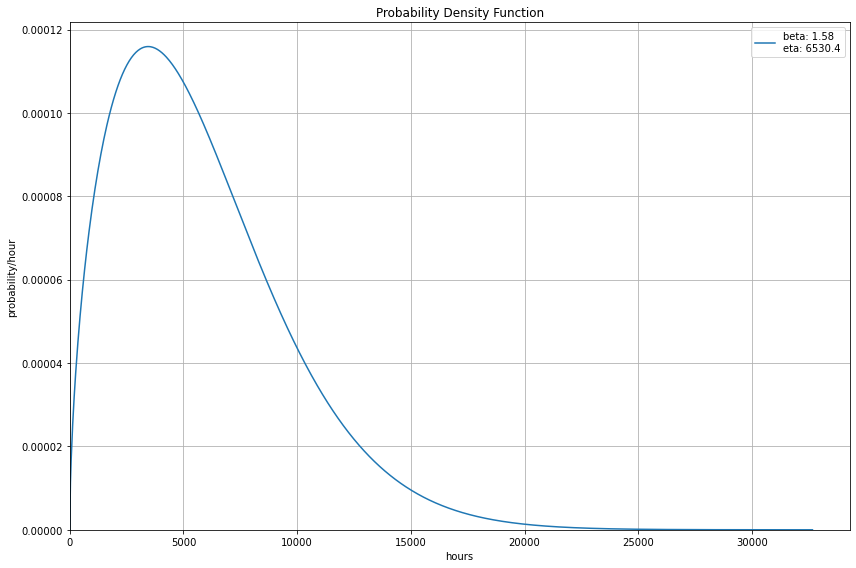

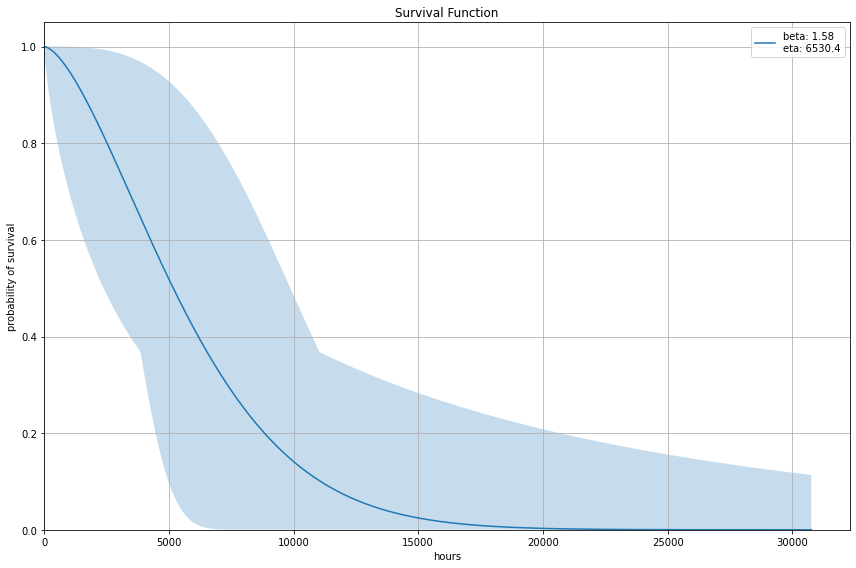

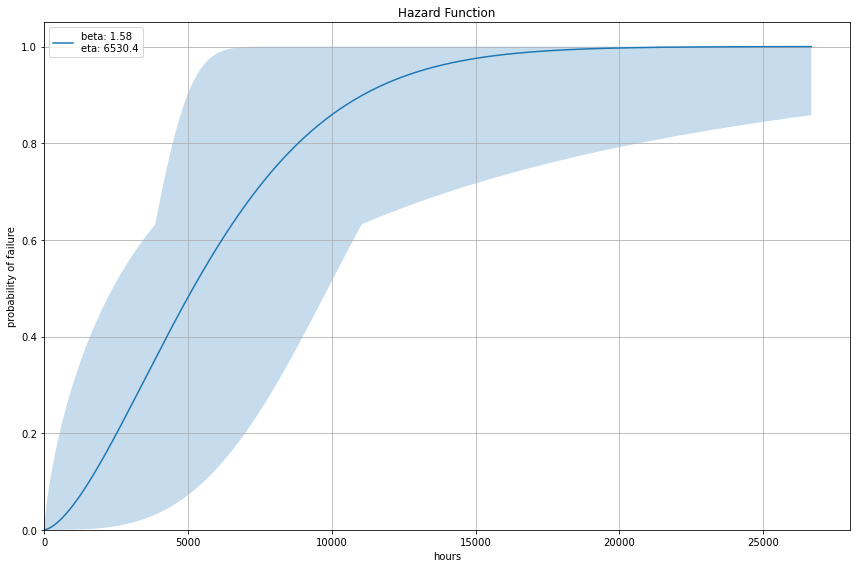

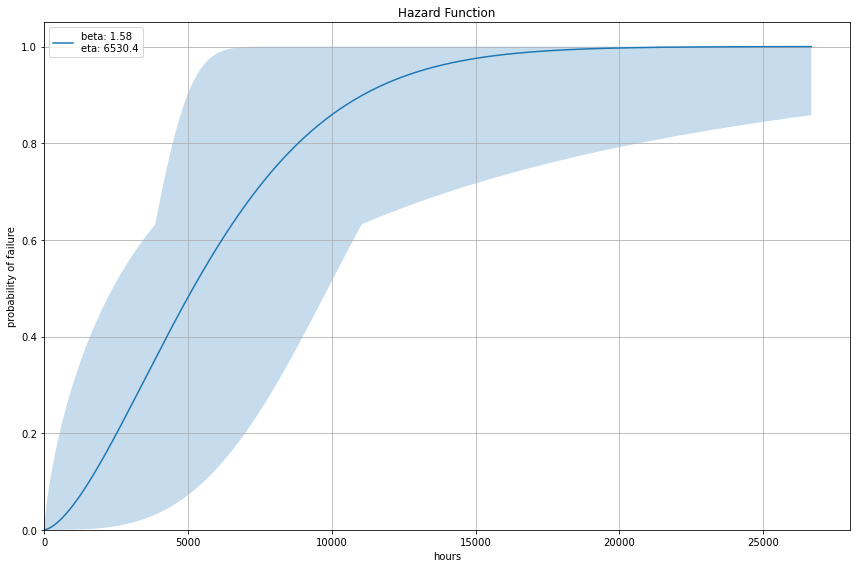

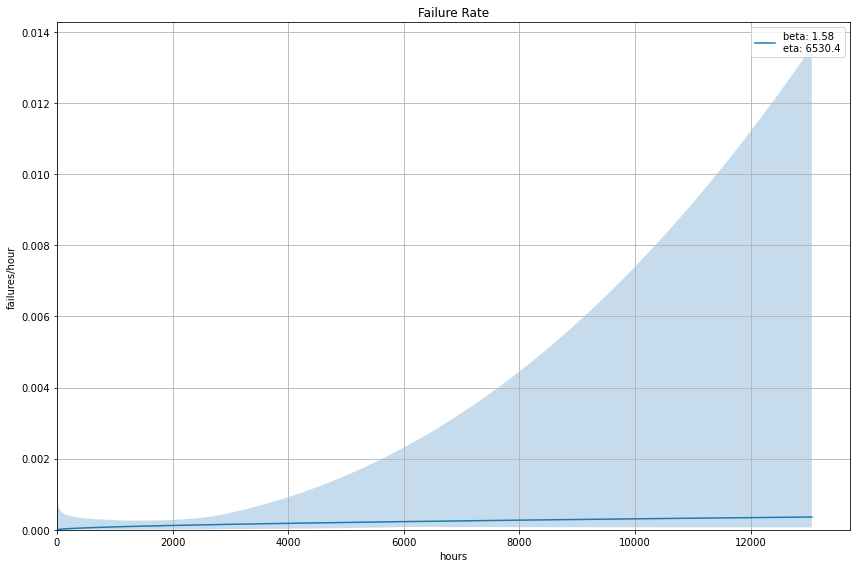

In [12]:
analysis.pdf()      # probability density function
analysis.sf()       # survival function
#analysis.hazard()   # hazard function
analysis.cdf()      # cumulative distribution function
analysis.fr()       # failure rate

# For test design


In [30]:
designer = weibull.Design(
target_cycles=10000,
reliability=0.9,
confidence_level=0.95,
expected_beta=1.5
)
# The 'test_cycles' parameter can be in any units.
# Days, weeks, hours, cycles, etc., so long
# as the target unit is consistent
print(f'Minimum number of units for 10000 hour run:{designer.num_of_units(test_cycles=10000)}')
print(f'Minimum hours for 20 units: {designer.num_of_cycles(number_of_units=20)}')


Minimum number of units for 10000 hour run:28.433158805743403
Minimum hours for 20 units: 12643.386376993836


# Weibayes Analysis

In [32]:
import weibull
designer = weibull.Design(
target_cycles=40e6,
reliability=0.98,
confidence_level=0.95,
expected_beta=2
)
print(f'Minimum hours for 62 units: {designer.num_of_cycles(number_of_units=62)}')

Minimum hours for 62 units: 61860134.45191945


Weibayes analysis on the data would arrive at the same result.:

In [33]:
import weibull
# we want N units to run for H hours each
N = 62
H = 62.0e6
run_times_desired = [H] * N
weibayes = weibull.Weibayes(run_times_desired, confidence_level=0.95, beta=2)
print(f'B2 life: {weibayes.b(2)}')

B2 life: 40090439.86038491


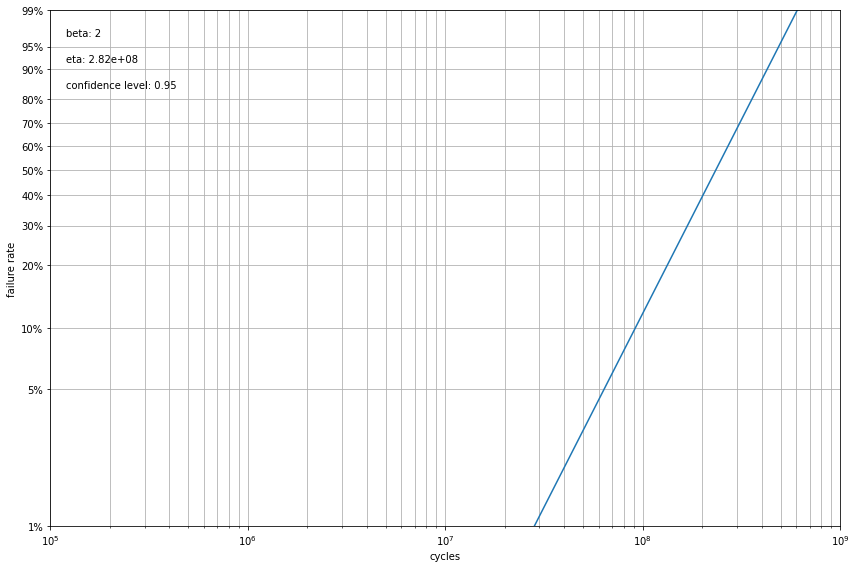

In [39]:
weibayes.plot()